## Lab 8 : Otsu’s thresholding

### Author   :Niyas Mon P
### Roll No. :EE20B094

In [299]:
#  Before running the code blocks, please ensure all the images are uploaded

In [300]:
# importing necessary libraries
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import cv2

In [301]:
# reading the images
I1 = cv2.imread('palmleaf1.png')
I2 = cv2.imread('palmleaf2.png')

In [302]:
I2.shape

(196, 400, 3)

In [303]:
# convert image from 3 channel to 1 channel image. cause, it is in gray scale
I1 = I1[:,:,0]
I2 = I2[:,:,0]

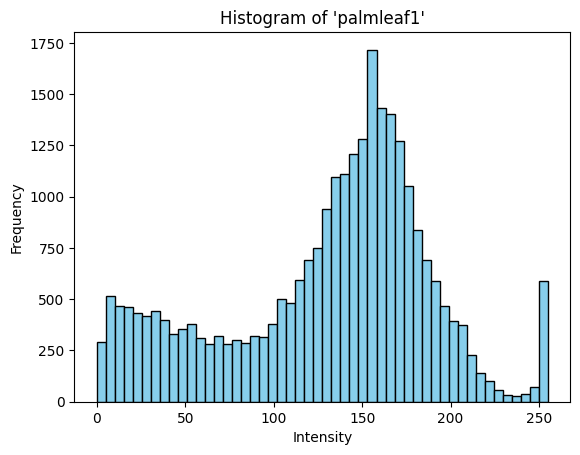

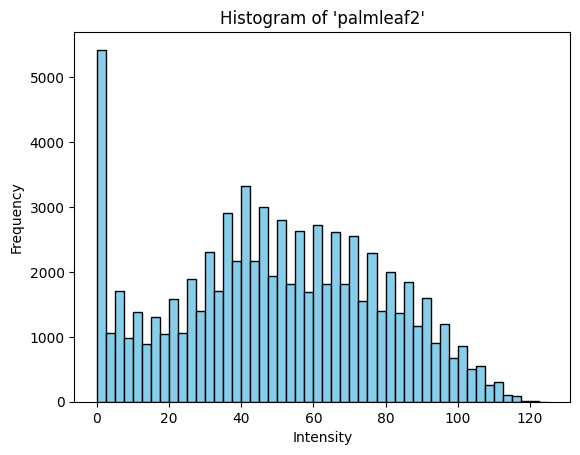

In [304]:
# Plotting the histogram of intensity values for both images to get an intuition of optimal threshold
plt.hist(I1.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of \'palmleaf1\'')
plt.show()

plt.hist(I2.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of \'palmleaf2\'')
plt.show()

## **Otsu’s thresholding**

To produce a binary image, we need to find an optimal threshold. Here we use Otsu's global thresholding for the 2 images given.
Let t be the threshold value, we have

$$
0\leq t\leq L
$$
where L is the maximum intensity value in the image.

Let $F(i)$ be the frequanecy of intensity $i$.Class 1 is the set of pixels satisfying $\{i : 0\leq i \leq t\}$ and class 2 is the set of pixels satisfying $\{i : t< i \leq L\}$. Let the number of pixels in class1 and class2 be $N_{1}$ and $N_{2}$ respectively. The means and variances of class $j$, $\mu_{j}$ and $\sigma_{j}^{2}$, are defined as

$$
\mu_{j} = \frac{\Sigma_{i\in class_j}iF(i)}{N_{j}}
$$

$$
\sigma^{2}_{j} = \frac{\Sigma_{i \in C_{j}}(i-\mu_{j})^{2}F(i)}{N_{j}}
$$

Also, the means and variances of the entire image, $\mu_{T}$ and $\sigma^{2}_{T}$, are

$$
\mu_{T} = \frac{\Sigma_{i=0}^{L}iF(i)}{N}
$$

$$
\sigma^{2}_{T} = \frac{\Sigma_{i=0}^{L}(i-\mu_{T})^{2}F(i)}{N}
$$

$N$ is the total number of pixels in the image.

The within class variance, $\sigma^{2}_{w}$, is defined as

$$
\sigma^{2}_{w} = \frac{\Sigma_{j=1}^{2}\sigma_{j}^{2}N_{j}}{N}
$$

The between class variance, $\sigma_{b}^{2}$ is defined as

$$
\sigma^{2}_{b} = \frac{\Sigma_{j=1}^{2}(\mu_{j}-\mu_{T})^{2}N_{j}}{N}
$$

Inorder to get an optimal threshold, we need to maximize between-class variance and minimize within-class variance

The optimal threshold $t^{*}$ using Otsu's method is given by

$$
t^{*} = argmax(\sigma^{2}_{b}(t)) = argmin(\sigma^{2}_{w}(t))
$$



`get_OTSUthreshold` function takes the image as input and return the optimal threshold using Otsu's thresholding

In [305]:
def get_OTSUthreshold(img):

  # minmum and maximum values of the intensities in the image
  min, max = np.min(img), np.max(img)

  img        = img.flatten() # converting image to a 1D array
  img        = np.sort(img)  # sorting the intensities from low to high

  u          = np.mean(img) # mean of entire image
  N          = np.size(img) # total no. of pixels in the image
  thresholds = range(min,max) # range of thresholds

  # initializing t* and variance
  t_opt      = min
  sigma_opt  = 0

  for t in thresholds:

    N1       = np.sum(img<=t) # no. of pixels below threshold
    N2       = N - N1 # no. of pixels above threshold

    class1   = img[:N1], # extracting pixels of class 1
    class2   = img[N1:]  # class 2

    u1       = np.mean(class1) # mean of class 1
    u2       = np.mean(class2) # mean of class 2

    # between-class variance
    sigma2   = ((u1-u)**2)*N1/N + ((u2-u)**2)*N2/N

    # selecting the t* for which between-class variance is maximum
    if sigma2 > sigma_opt:
      t_opt   = t
      sigma_opt = sigma2

  return t_opt

### Binary imaging
`binary_image` function takes the image and the threshold value as inputs and returns the binary image. All pixel values above the threshold is set to High and below is set to zero.

In [306]:
def binary_image(img,threshold):
  bin_img = np.where(img> threshold, 255,0)
  return bin_img

### Plots

-------------------------------------
 Threshold for 'palmleaf1.png' : 104
 Threshold for 'palmleaf2.png' : 50
-------------------------------------


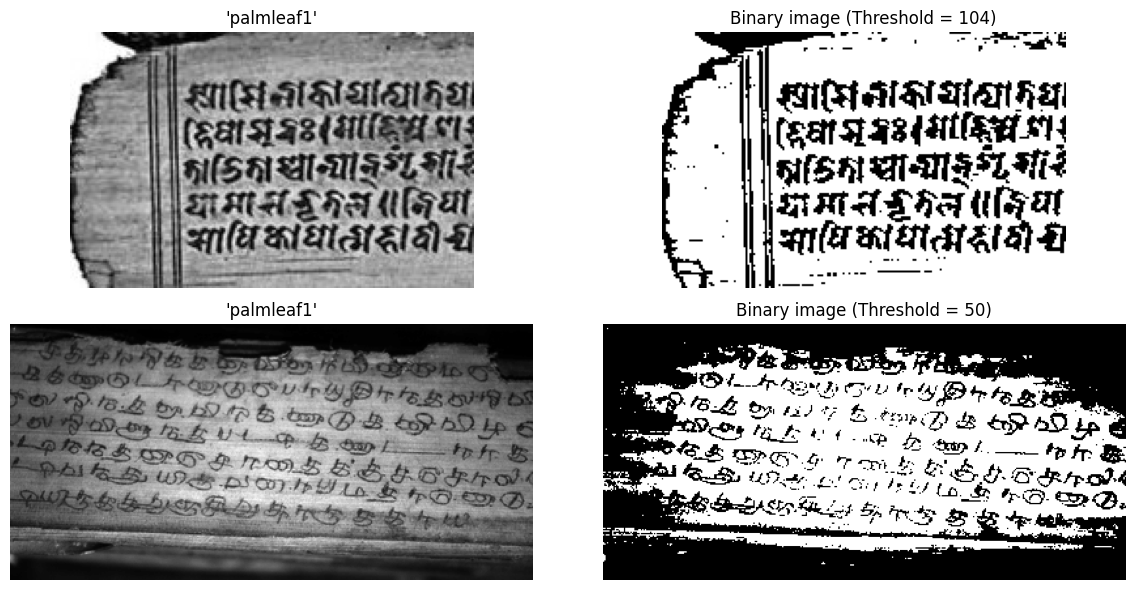

In [310]:
T1 = get_OTSUthreshold(I1) # T1 is the optimal threshold for image 1
binary_image1 = binary_image(I1,T1) # binary image

T2 = get_OTSUthreshold(I2) # T2 is the optimal threshold for image 1
binary_image2 = binary_image(I2,T2) # binary image

print("-------------------------------------")
print(f" Threshold for \'palmleaf1.png\' : {T1}")
print(f" Threshold for \'palmleaf2.png\' : {T2}")
print("-------------------------------------")

# plotting
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.imshow(I1,cmap='gray')
plt.title(f'\'palmleaf1\'')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(binary_image1,cmap='gray')
plt.title(f'Binary image (Threshold = {T1})')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(I2,cmap='gray')
plt.title(f'\'palmleaf1\'')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(binary_image2,cmap='gray')
plt.title(f'Binary image (Threshold = {T2})')
plt.axis('off')

plt.tight_layout()
plt.show()

## Inferences
* The thresholding used here is global thresholding
* The thresholding gives a better binary image for 'palmleaf1.png' than 'palmleaf2.png' . This is beacause in 'palmleaf1.png' illumination is more or less uniform, But in 'palmleaf2png' there is gradient of illumination.
* Inorder to get better binary thresholding for second image, we may need to go for adaptive thresholding.